# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


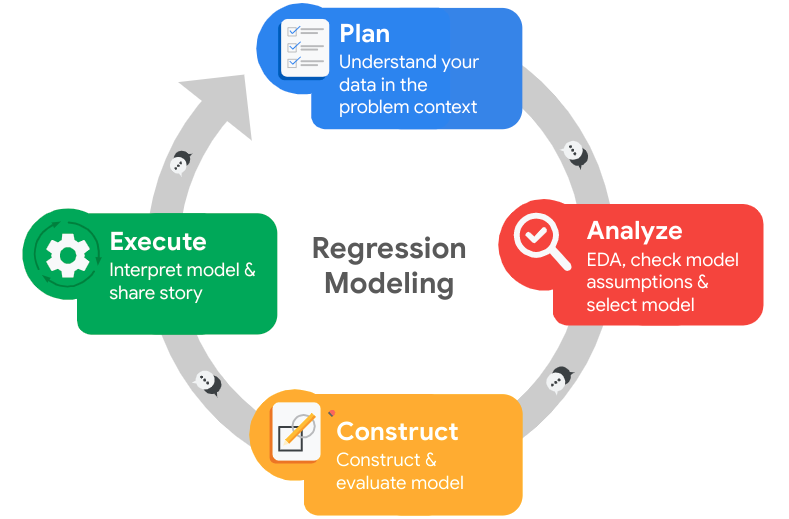

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below.  This project uses a dataset called `HR_capstone_dataset.csv`. It represents 10 columns of self-reported information from employees of a multinational vehicle manufacturing corporation.

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

- Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage?
- Do you have any ethical considerations in this stage?




***ANS***

- The primary stakeholders in this project are the HR leaders at Salifort Corporation.
  
- The goal of the project is to analyze employee data from Salifort in order to build a predictive model that determines whether an employee is likely to leave the company. The model will use features such as department, average monthly working hours, and other relevant variables. Based on this analysis, we aim to provide a summary of key factors influencing employee turnover and offer recommendations to help reduce attrition.

  
- I anticipate that features such as `salary`, `promotion_last_5_years`, and `average_monthly_hours` will be particularly useful for building an effective model. Also, we may need to engineer or extract other relevant features as the analysis progresses.

  
- The project leverages various courses resources and notebooks, especially:
    * Applying the PACE framework to structure the data science workflow.
    * Cleaning, analyzing, and visualizing data in Python to uncover key insights.
    * Using `scikit-learn` and `XGBoost` to develop and evaluate machine learning models.
    <br>
- Currently, the data appears to be self-reported by employees, with no obvious signs of bias or ethical issues. However, to ensure the model produces accurate and reliable results, we must carefully clean the data, verify the assumptions of our modeling approach, and interpret the outcomes responsibly.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Machine Learning packages

## Helpful functinos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit

## Model Building functions
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

## Metrics functions
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## Pickle module
import pickle

In [2]:
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv("data/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


***Basic Notes***
- The dataset contains 14,999 records and 10 features. There are no missing values.
- Two of the features — salary and Department — are categorical, while the remaining variables are numerical.
- Two variable names, `Department` and `Work_accident`, require standardization to maintain consistency with the rest of the dataset.
- The column name `average_monthly_hours` appears to be misspelled and should be reviewed for correction to ensure clarity and consistency in the dataset.

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


***Basic Notes***
- All variables exhibit stable distributions without unusual or outlying values.
- Notably, the maximum value for `time_spend_company` is 10 years, while the maximum number of projects is 7. This may suggest that most projects within the company are long-term, which could be typical for an alternative energy vehicle company. However, this observation warrants further analysis to confirm.

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns = {
    'average_montly_hours' : 'average_monthly_hours',
    'Work_accident' : 'work_accident',
    'time_spend_company' : 'tenure',
    'Department' : 'department'
})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()

np.int64(3008)

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated(keep = False)].sort_values(by = [col for col in df0.columns]).head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
30,0.09,0.62,6,294,4,0,1,0,accounting,low
12030,0.09,0.62,6,294,4,0,1,0,accounting,low
14241,0.09,0.62,6,294,4,0,1,0,accounting,low
71,0.09,0.77,5,275,4,0,1,0,product_mng,medium
12071,0.09,0.77,5,275,4,0,1,0,product_mng,medium
14282,0.09,0.77,5,275,4,0,1,0,product_mng,medium
652,0.09,0.77,6,290,4,0,1,0,technical,medium
12652,0.09,0.77,6,290,4,0,1,0,technical,medium
14863,0.09,0.77,6,290,4,0,1,0,technical,medium
278,0.09,0.78,6,254,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

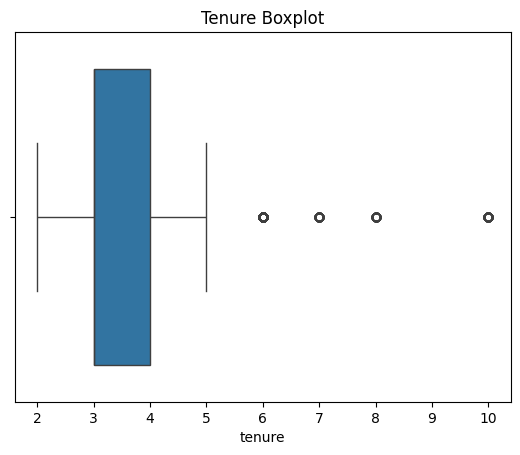

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(
    data = df1,
    x = 'tenure'
)

plt.title('Tenure Boxplot')
plt.show()

In [14]:
# Determine the number of rows containing outliers
p25 = np.percentile(df1['tenure'], 25)
p75 = np.percentile(df1['tenure'], 75)
iqr = p75 - p25

upper_limit = p75 + iqr * 1.5 
lower_limit = p25 - iqr * 1.5 


outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
outliers.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
17,0.78,0.99,4,255,6,0,1,0,sales,low
34,0.84,0.87,4,246,6,0,1,0,hr,low
47,0.57,0.70,3,273,6,0,1,0,support,low
67,0.90,0.98,4,264,6,0,1,0,product_mng,medium


In [15]:
print(f'Lower Limit => {lower_limit}')
print(f'Upper Limit => {upper_limit}')
print(f'Number of Outliers => {len(outliers)}')

Lower Limit => 1.5
Upper Limit => 5.5
Number of Outliers => 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

---
---

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
print(df1.left.value_counts())
print(100 * '-')
print(df1.left.value_counts(normalize = True))

left
0    10000
1     1991
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


***Notes***
- The dataset is imbalanced, with 83% of the records representing employees who did not leave the company. However, the imbalance is not severe enough to require resampling at this stage. Resampling is typically considered when one class represents 90% or more of the data, as extreme imbalance can significantly affect model performance.

### Further analysis and visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

#### Focusing on `satisfaction_level` variable

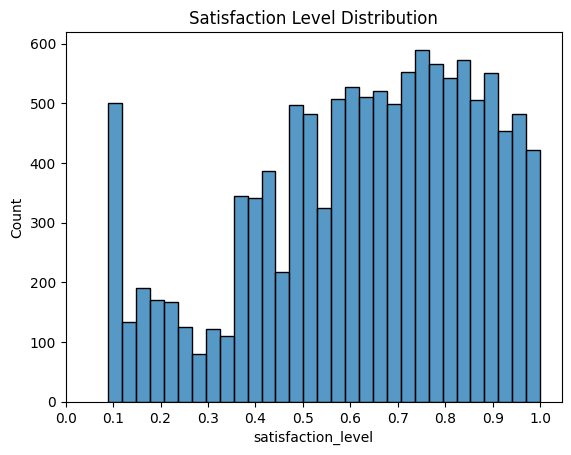

In [17]:
sns.histplot(data = df1, x = 'satisfaction_level')
plt.title('Satisfaction Level Distribution')
plt.xticks(np.linspace(0.0, 1, num = 11))
plt.show()

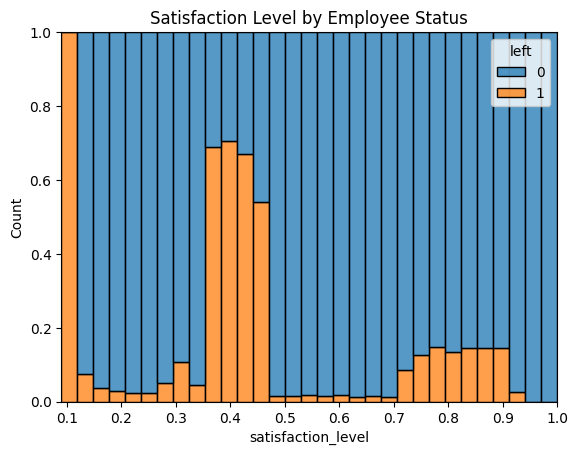

In [18]:
sns.histplot(data = df1, x = 'satisfaction_level', hue = 'left', multiple = 'fill')
plt.title('Satisfaction Level by Employee Status')
plt.xticks(np.linspace(0.1, 1, num = 10))
plt.show()

In [19]:
df1[(df1.satisfaction_level >= 0.35) & (df1.satisfaction_level <= 0.5)].describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823,1823
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498,936
mean,0.431618,0.594959,2.878771,168.354909,3.201317,0.115743,0.473944,0.014262,NaN,NaN
std,0.046252,0.150257,1.163903,44.075547,1.106094,0.320005,0.499458,0.118602,NaN,NaN
min,0.350000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.390000,0.490000,2.000000,138.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.430000,0.540000,2.000000,153.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.480000,0.670000,4.000000,188.000000,3.000000,0.000000,1.000000,0.000000,NaN,NaN


In [20]:
df1[(df1.satisfaction_level >= 0.7) & (df1.satisfaction_level <= 0.9)].describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866.000000,3866,3866
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1055,1822
mean,0.798774,0.751580,3.855923,207.099586,3.344801,0.152354,0.127781,0.019400,NaN,NaN
std,0.059856,0.160342,0.900302,44.554011,1.316173,0.359410,0.333889,0.137944,NaN,NaN
min,0.700000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.750000,0.610000,3.000000,169.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.800000,0.760000,4.000000,213.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.850000,0.890000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


***Notes***
* While `satisfaction_level` appears to follow a roughly uniform distribution across the [0, 1] range, there are noticeable dips in frequency around certain values — particularly near 0.2 and 0.3 — indicating that some satisfaction levels are less common among employees.
* Employees with satisfaction levels between 0.35 and 0.5 show a relatively high turnover rate. Interestingly, another group with satisfaction levels between 0.7 and 0.9 also exhibits a noticeable rate of leaving, despite their seemingly high satisfaction. Upon further inspection using the `describe()` method, many of these employees are found to have low salaries and are working long average monthly hours.

---

#### Focusing on `salary` variable

In [21]:
left_counts = df1[df1.left == 1]['salary'].value_counts()
total_counts = df1['salary'].value_counts()
turnover_rate = (left_counts / total_counts) * 100
turnover_rate

salary
low       20.452962
medium    14.616993
high       4.848485
Name: count, dtype: float64

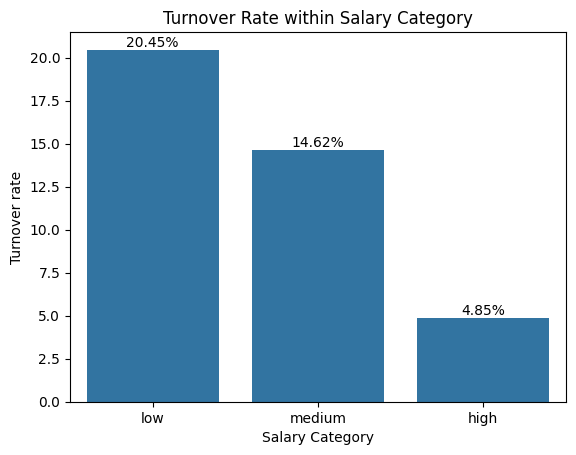

In [22]:
# Turnover Rate within each category: percentage of employees who left within each salary category 
ax = sns.barplot(
    y = turnover_rate.values,
    x = turnover_rate.index,
    order = ['low', 'medium', 'high']
)

for p in ax.patches:
    ax.annotate(
        f'{round(p.get_height(), 2)}%',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha = 'center', va = 'bottom'
    )
    
plt.title('Turnover Rate within Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Turnover rate')
plt.show()

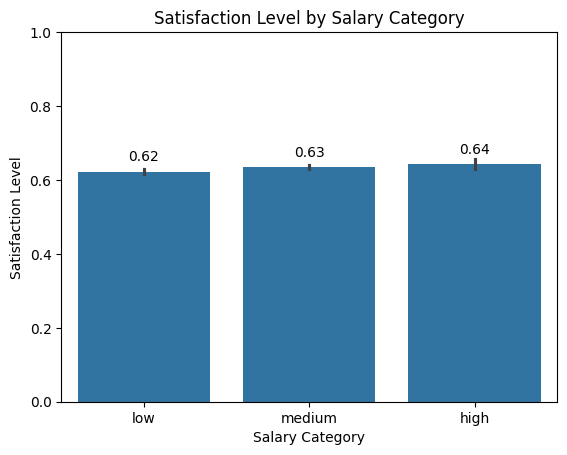

In [23]:
# Visualizing the satisfaction_level across the different salary categories
ax = sns.barplot(
    data = df1,
    x = 'salary',
    y = 'satisfaction_level'
)

plt.title('Satisfaction Level by Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Satisfaction Level')
plt.ylim(0, 1)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2.0, p.get_height() + 0.02), 
        ha = 'center', va = 'bottom'    
    )
    

plt.show()

***Notes***
* While `salary` levels shows a strong relationship with employee turnover (left), the `satisfaction_level` remains relatively consistent across different salary categories. This suggests that other factors—such as `average_monthly_hours` or `promotion_last_5years`—may have a greater influence on employee satisfaction and decisions to leave.

---

### Focusing on `average_monthly_hours`

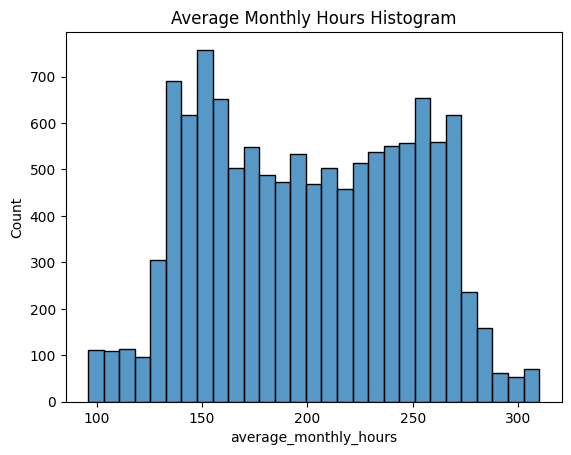

In [24]:
sns.histplot(
    data = df1,
    x = 'average_monthly_hours',
)

plt.title('Average Monthly Hours Histogram')
plt.show()

In [25]:
# constructing a categorical column to represent the levels of working hours
df2 = df1.copy()

df2['average_monthly_hours_levels'] = pd.qcut(
    df2['average_monthly_hours'],
    4,
    labels = ['low', 'medium', 'high', 'very_high']
)

df2['average_monthly_hours_levels'].value_counts()

average_monthly_hours_levels
medium       3040
low          3005
high         2979
very_high    2967
Name: count, dtype: int64

In [26]:
df2[df2.left == 1]['average_monthly_hours_levels'].value_counts()

average_monthly_hours_levels
very_high    832
low          793
high         249
medium       117
Name: count, dtype: int64

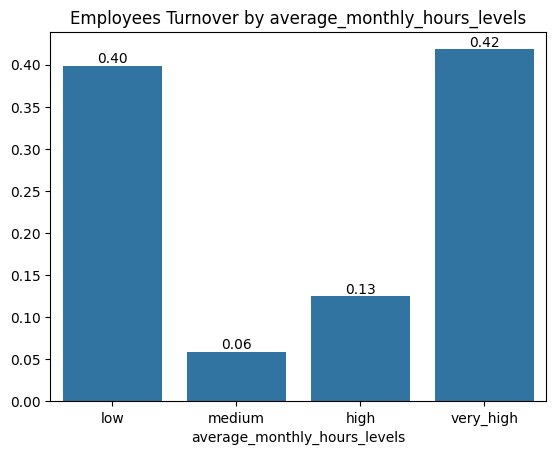

In [27]:
data = df2[df2.left == 1]['average_monthly_hours_levels'].value_counts(normalize = True)
ax = sns.barplot(
    x = data.index,
    y = data.values
)


for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha = 'center', va = 'bottom'
    )

plt.title('Employees Turnover by average_monthly_hours_levels')
plt.show()

In [28]:
df2.groupby(['average_monthly_hours_levels'],  observed = False)[['average_monthly_hours']].agg(['mean'])

,average_monthly_hours
,mean
average_monthly_hours_levels,
low,138.751414
medium,178.081579
high,222.567640
very_high,263.745534


***Notes***
* The distribution of `average_monthly_hours` begins with low frequencies, then fluctuates between peaks and dips across the range.
* The majority of employees who left fall into two groups: those who worked very few hours per month and those who worked very high hours.
   > **Low working hours group:** This group accounts for 40% of employees who left. The average monthly working hours in this category is around 139  hours, which translates to approximately 7 hours per day (assuming 20 working days per month). While this workload seems reasonable, the high turnover suggests other underlying factors may be contributing to their decision to leave. Further investigation is needed to understand the reasons behind this group's high exit rate.
   
   > **Very high working hours group:** Representing 42% of the employees who left, this group had an average of 264 working hours per month, which equates to about 13 hours per day. This excessive workload is a more intuitive explanation for employee turnover, as overwork can lead to burnout and dissatisfaction.

---

#### Focusing on `department` variable

In [29]:
df2.department.value_counts(normalize = True)

department
sales          0.270119
technical      0.187140
support        0.151864
IT             0.081394
RandD          0.057877
product_mng    0.057210
marketing      0.056125
accounting     0.051789
hr             0.050121
management     0.036361
Name: proportion, dtype: float64

In [30]:
df2[df2.left == 1].department.value_counts(normalize = True)

department
sales          0.276243
technical      0.195881
support        0.156705
IT             0.079357
hr             0.056755
marketing      0.056253
product_mng    0.055249
accounting     0.054746
RandD          0.042692
management     0.026118
Name: proportion, dtype: float64

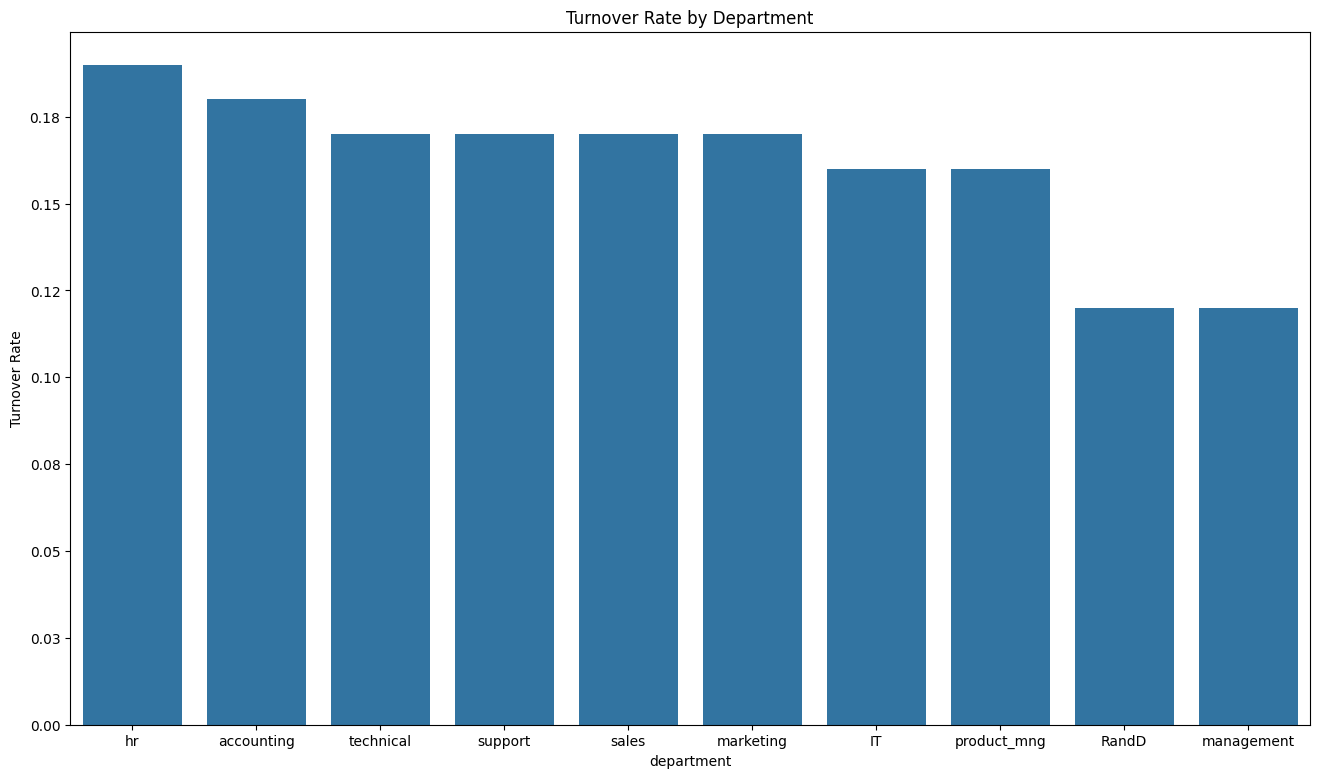

In [31]:
data = (df2[df2.left == 1].department.value_counts() / df2.department.value_counts()).sort_values(ascending = False).round(2)

plt.figure(figsize = (16, 9))
ax = sns.barplot(
    x = data.index,
    y = data.values
)

plt.title('Turnover Rate by Department')
plt.ylabel('Turnover Rate')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.2f}'))

plt.show()

***Notes***
- The turnover ratio appears relatively consistent across most departments. However, the `hr` and `accounting` departments exhibit slightly higher turnover rates, while the `randD` and `management` departments show notably lower turnover.

---

#### More analysis and visualization considering combinations of variables

##### Monthly working hours by Number of projects

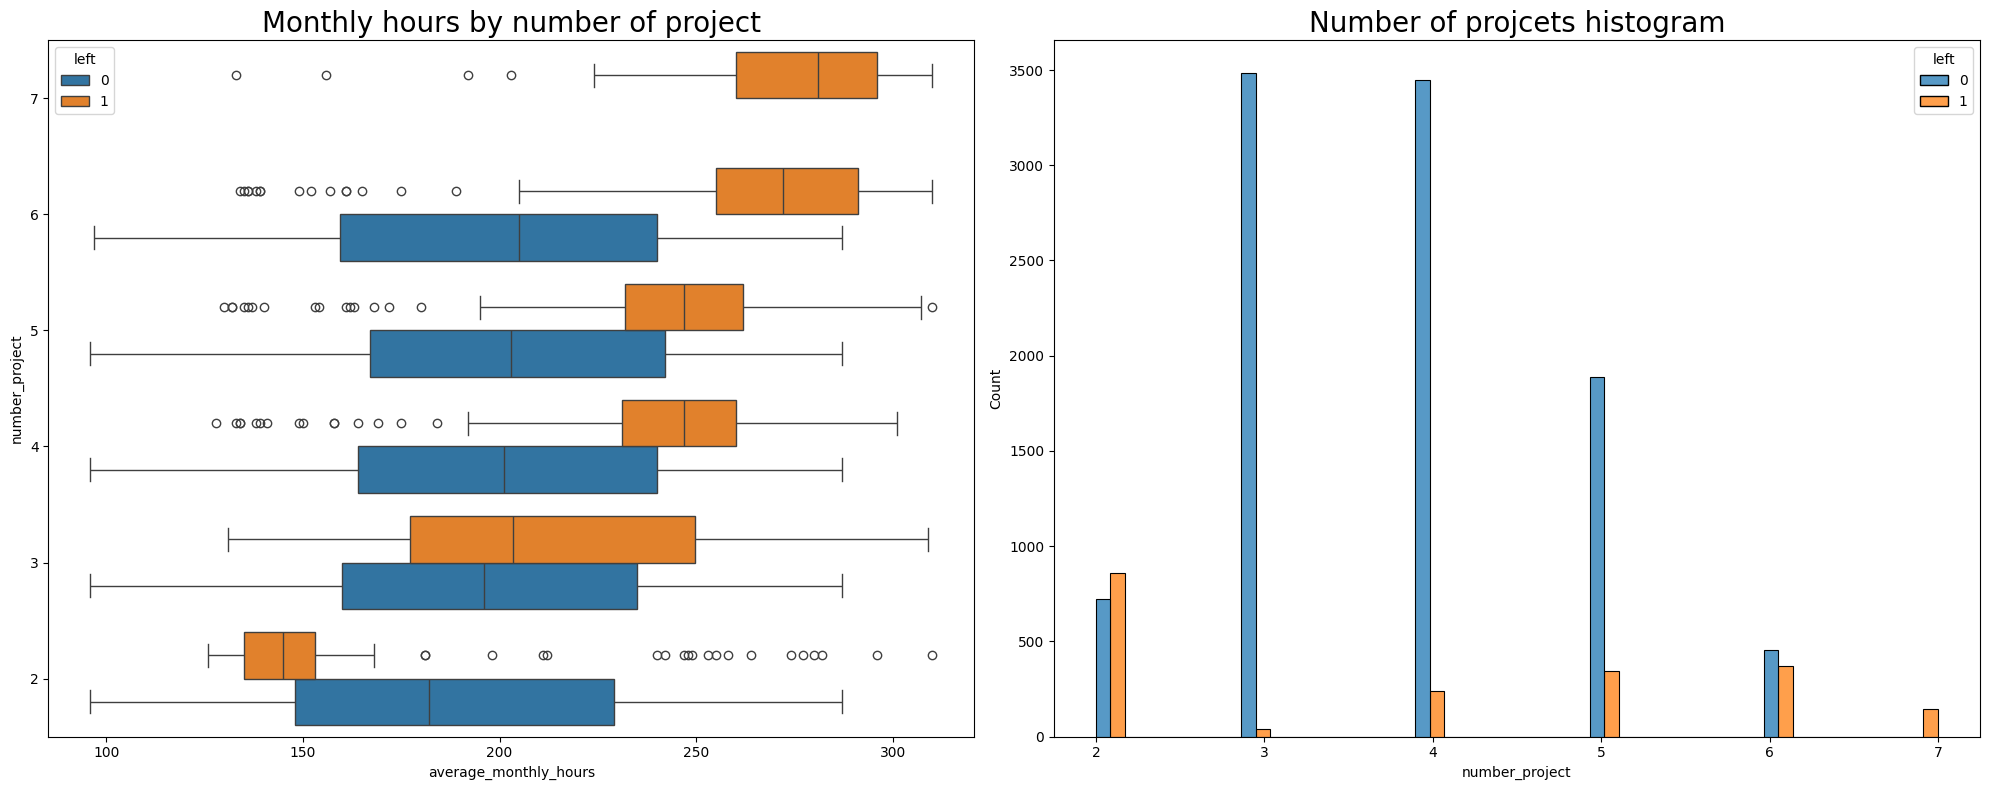

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

sns.boxplot(data = df2, x = 'average_monthly_hours', y = 'number_project', hue = 'left', orient = 'h', ax = ax1)
ax2 = sns.histplot(data = df2, x = 'number_project', hue = 'left', multiple = 'dodge', ax = ax2) 

ax1.set_title('Monthly hours by number of project', fontsize = 20); ax2.set_title('Number of projcets histogram', fontsize = 20);
ax1.invert_yaxis()

plt.tight_layout()
plt.show()

***Notes***  
The boxplot and histogram together reveal important insights:-
* Among employees who stayed, working hours are relatively consistent across all project counts, typically ranging from ~140 to ~240 hours per month.
* Among those who left, working hours tend to be higher than for retained employees across most project counts, except for employees involved in only 2 projects, where those who left worked fewer hours.
- The proportion of employees who left varies noticeably with the number of projects:-
    * **7 projects:** No employees stayed, suggesting this may represent long-tenured staff who are no longer active.
    * **6 projects:** A large portion left, indicating possible overwork or burnout.
    * **3 to 5 projects:** Most employees in this range stayed, suggesting this is a more balanced and satisfying workload.
    * **2 projects:** A high percentage left, likely representing newer employees who may be dissatisfied due to low salary, lack of promotion, or insufficient engagement.

* **Summary**
  > Left employees represent either those who worked fewer hours, such as those involved in 2 projects, or worked more hours than others such those involved in 6+ projects.
  
  > For those who are involved in 2 projects. This group likely includes newer hires who may feel disengaged or underappreciated. Also, it is likely that those have been fired due to low performance (evaluation score) compared to others.
  
  > For those who worked much more than others, they are probably left because of the overload.

In [33]:
df2.loc[df2.number_project == 7, ['left']].value_counts() ## As visualized above, all employees involved in 7 projects have left.

left
1       145
Name: count, dtype: int64

---

##### Satisfaction level by Average monthly hours

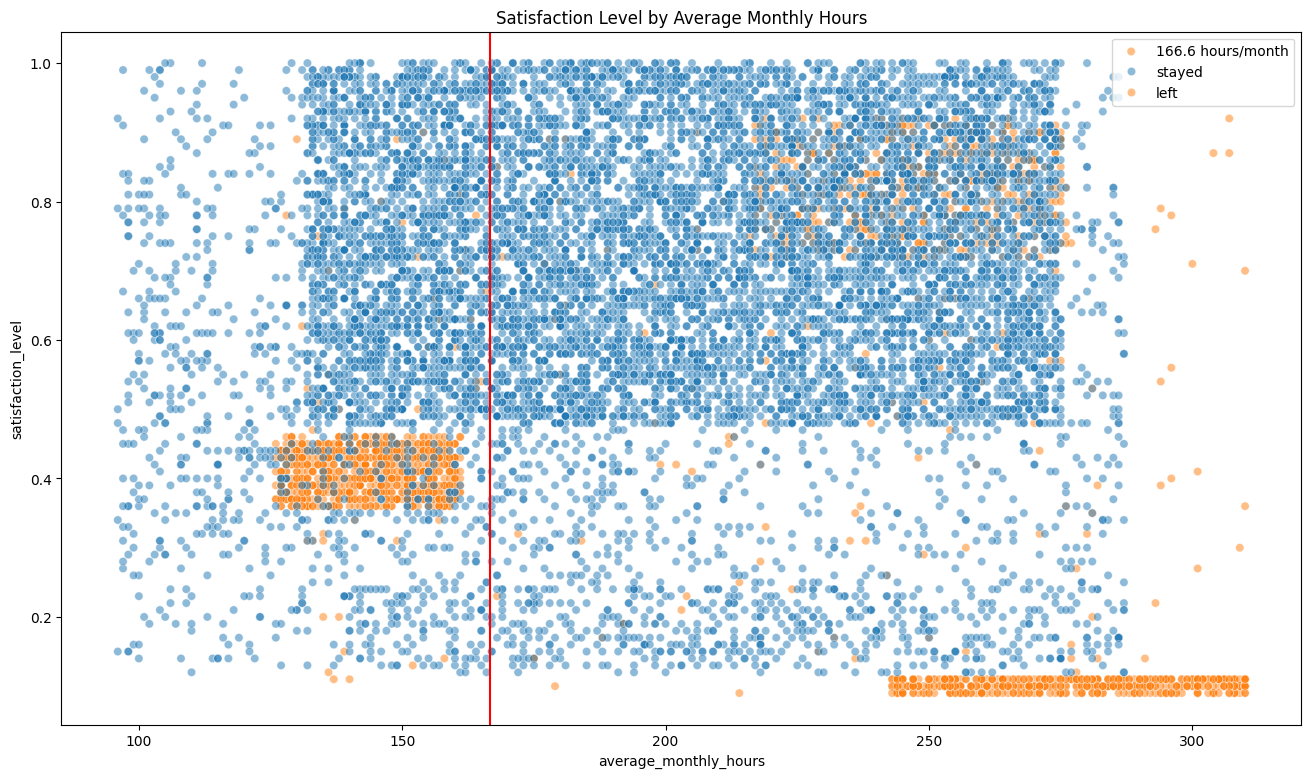

In [34]:
plt.figure(figsize = (16, 9))
ax = sns.scatterplot(
    data = df2,
    x = 'average_monthly_hours',
    y = 'satisfaction_level',
    hue = 'left',
    alpha = 0.5
)
ax.axvline(x = 166.6, linestyle = '-', color = 'red', label = '166.6 hours/month')

plt.title('Satisfaction Level by Average Monthly Hours')
plt.legend(labels = ['166.6 hours/month', 'stayed', 'left'])


plt.show()

***Notes***
- Assuming each employee works 40 hours per week and takes 2 weeks of vacation annually, the average expected monthly working hours is `40hours*50Weeks/12months = 166.6 hours a month`. This can be considered a reasonable threshold, above which working hours might be viewed as excessive.
- The scatterplot reveals that many employees exceed this threshold. Among those who left the company, three notable groups emerge:-
  * **Overloaded Workers (~240–320 hours/month):** These employees worked approximately 60–80 hours per week, which is considerably high. This likely contributed to their low satisfaction levels and eventual departure.
  * **ow-Hour, Low-Satisfaction Workers (~125–160 hours/month):** This group shows relatively low satisfaction levels (~0.4) despite working fewer hours. Their dissatisfaction might stem from internal comparisons with overworked peers or perceived unfairness in workload distribution.
  * **High-Hour, High-Satisfaction Workers (~240–280 hours/month):** Interestingly, this group maintained high satisfaction levels (~0.7–0.9) despite heavy workloads. Their decision to leave could be related to burnout or stress.

---

##### Monthly hours by evaluation score 

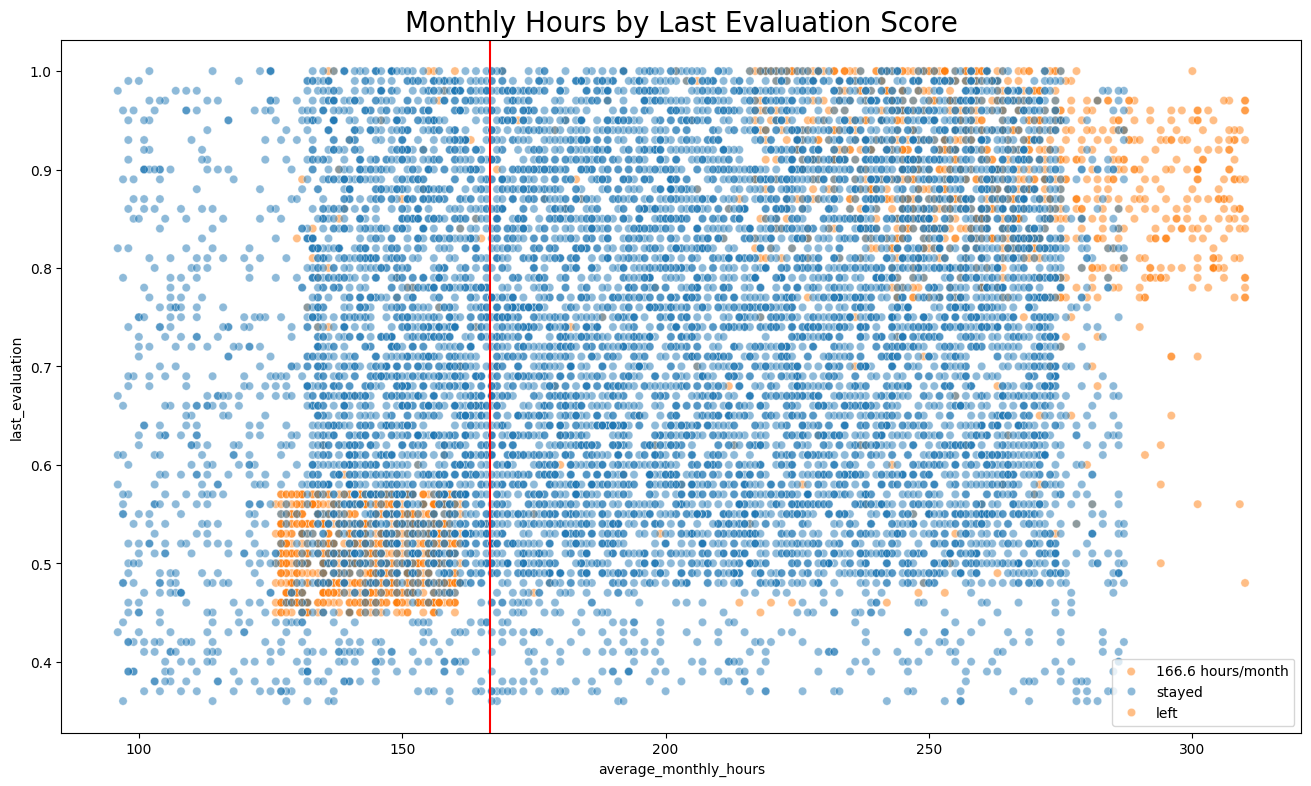

In [35]:
plt.figure(figsize = (16, 9))
ax = sns.scatterplot(
    data = df2,
    x = 'average_monthly_hours',
    y = 'last_evaluation',
    hue = 'left',
    alpha = 0.5
)
ax.axvline(x = 166.6, color = 'red', linestyle = '-', label = '166.6 hours/month')

ax.set_title('Monthly Hours by Last Evaluation Score', fontsize = 20)
ax.legend(labels = ['166.6 hours/month', 'stayed', 'left'])


plt.show()

***Notes***
- As mentioned earlier, the scatter plot indicates that most employees worked more than 166.6 hours per month, and the majority had good evaluation scores.
- Employees who left generally fall into two groups:
    - Those with high evaluation scores but who worked excessive hours — possibly indicating they left due to overload.
    - hose with low evaluation scores and fewer working hours — possibly underperformers or disengaged employees.
- Overall, there appears to be a positive correlation between evaluation scores and average_monthly_hours.

----

##### Satisfaction by tenure

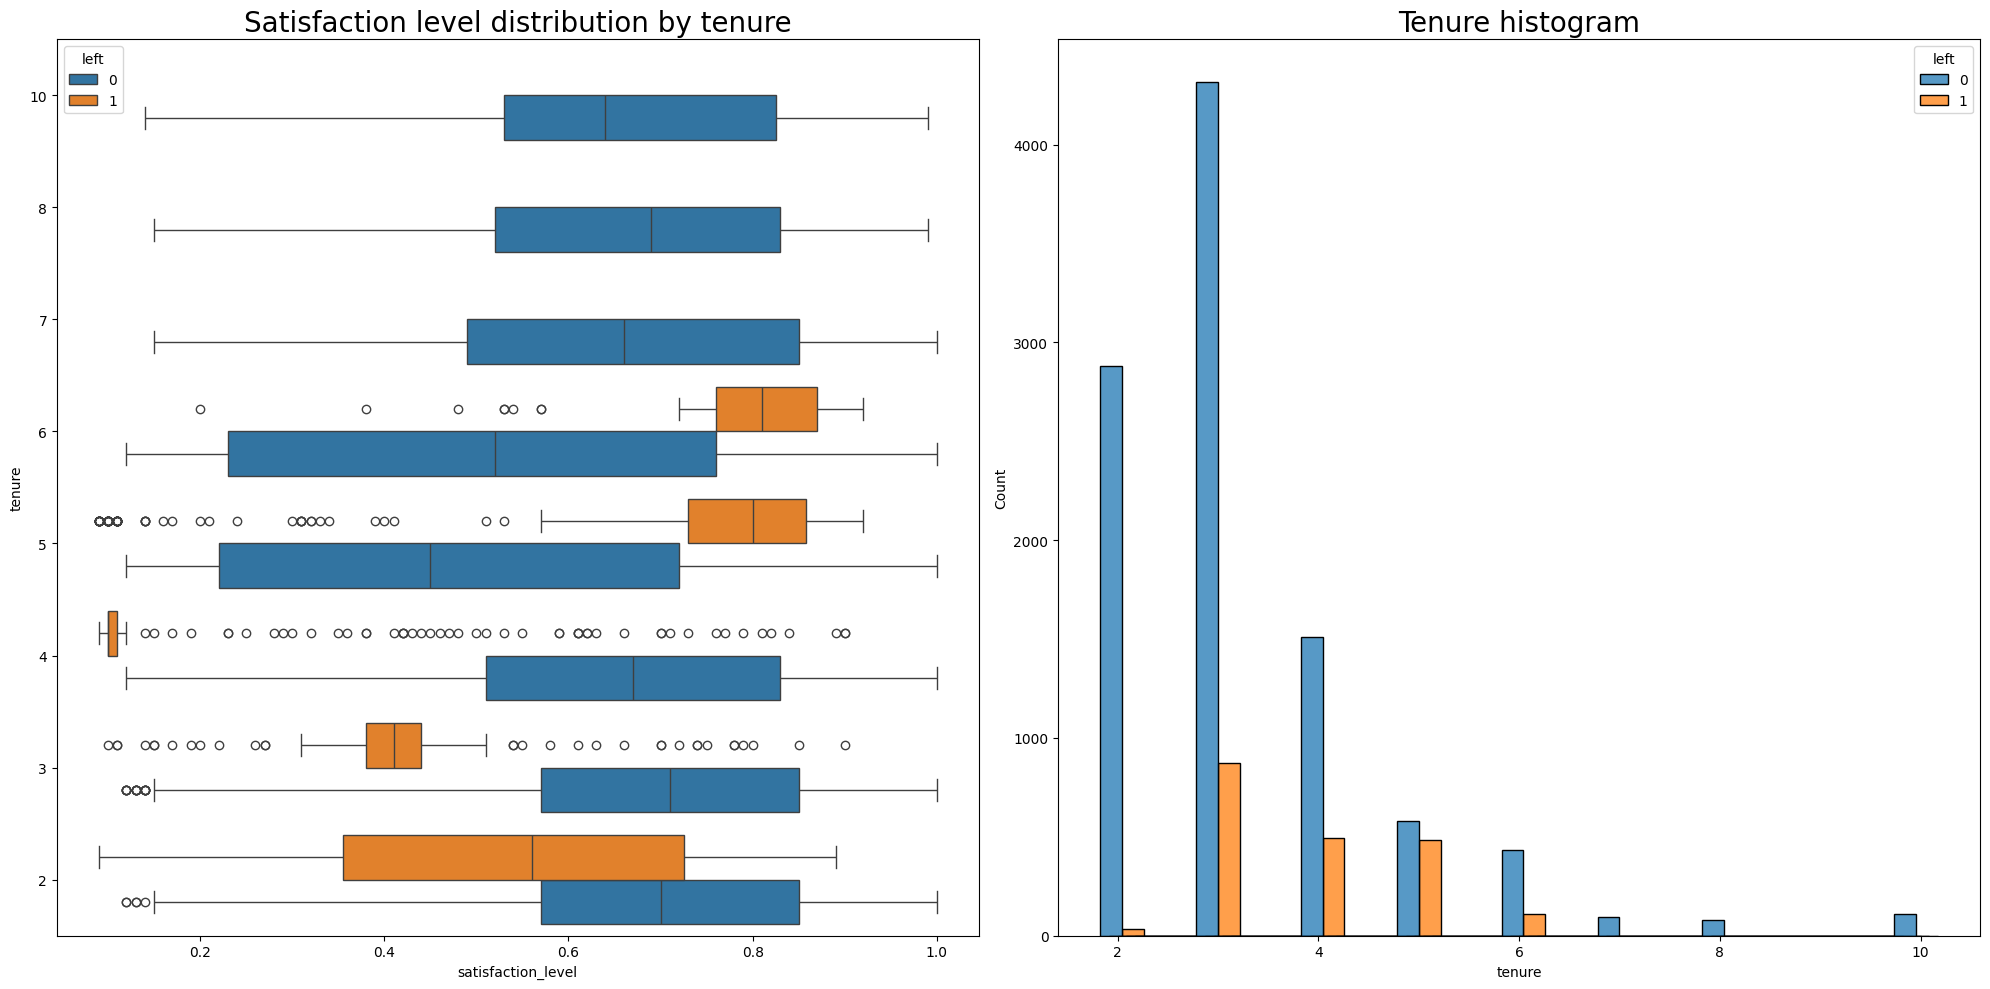

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

sns.boxplot(data = df2, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = 'h', ax = ax1)
sns.histplot(data = df2, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5,ax = ax2)

ax1.set_title('Satisfaction level distribution by tenure', fontsize = 20); ax2.set_title('Tenure histogram', fontsize = 20)
ax1.invert_yaxis()

plt.tight_layout()
plt.show()

***Notes***
- Generally, employees who stayed, their satisfaction_level typically ranges from ~0.5 to 0.85. Among them, long-tenured employees (those with higher years at the company) tend to be more satisfied and less likely to leave. However, these employees represent a small portion of the dataset, likely corresponding to high-ranking or well-compensated individuals.
  
-  Employees with 3 to 6 years of tenure show a higher turnover rate compared to other groups. Interestingly, this group contains two sub-patterns:
    > Some employees left despite having a high satisfaction level, especially those with 5 or 6 years at the company. These may be due to overwork, lack of promotions, or burnout.
    
    > Others left with a low satisfaction level, which may be driven by inadequate compensation or lack of recognition.
-  A large proportion of employees with 2 years of tenure tend to stay and exhibit a relatively high satisfaction_level, typically ranging from ~0.6 to 0.8.


-  The turnover patterns here differ from those observed in the number_project analysis:
    > In the tenure analysis, older employees tend to stay, while in the number_project analysis, employees involved in many projects are more likely to leave — possibly due to work overload.
    
    > Likewise, newer employees (low tenure) tend to stay, while employees involved in only 2 projects often leave, potentially due to dissatisfaction, underutilization, or perceived unfairness.



##### salary levels for different tenures

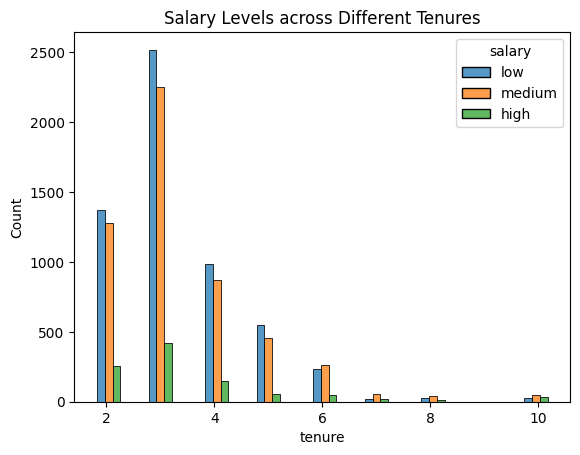

In [37]:
sns.histplot(data = df2, x = 'tenure', hue = 'salary', multiple = 'dodge', shrink = 5)

plt.title('Salary Levels across Different Tenures')

plt.show()

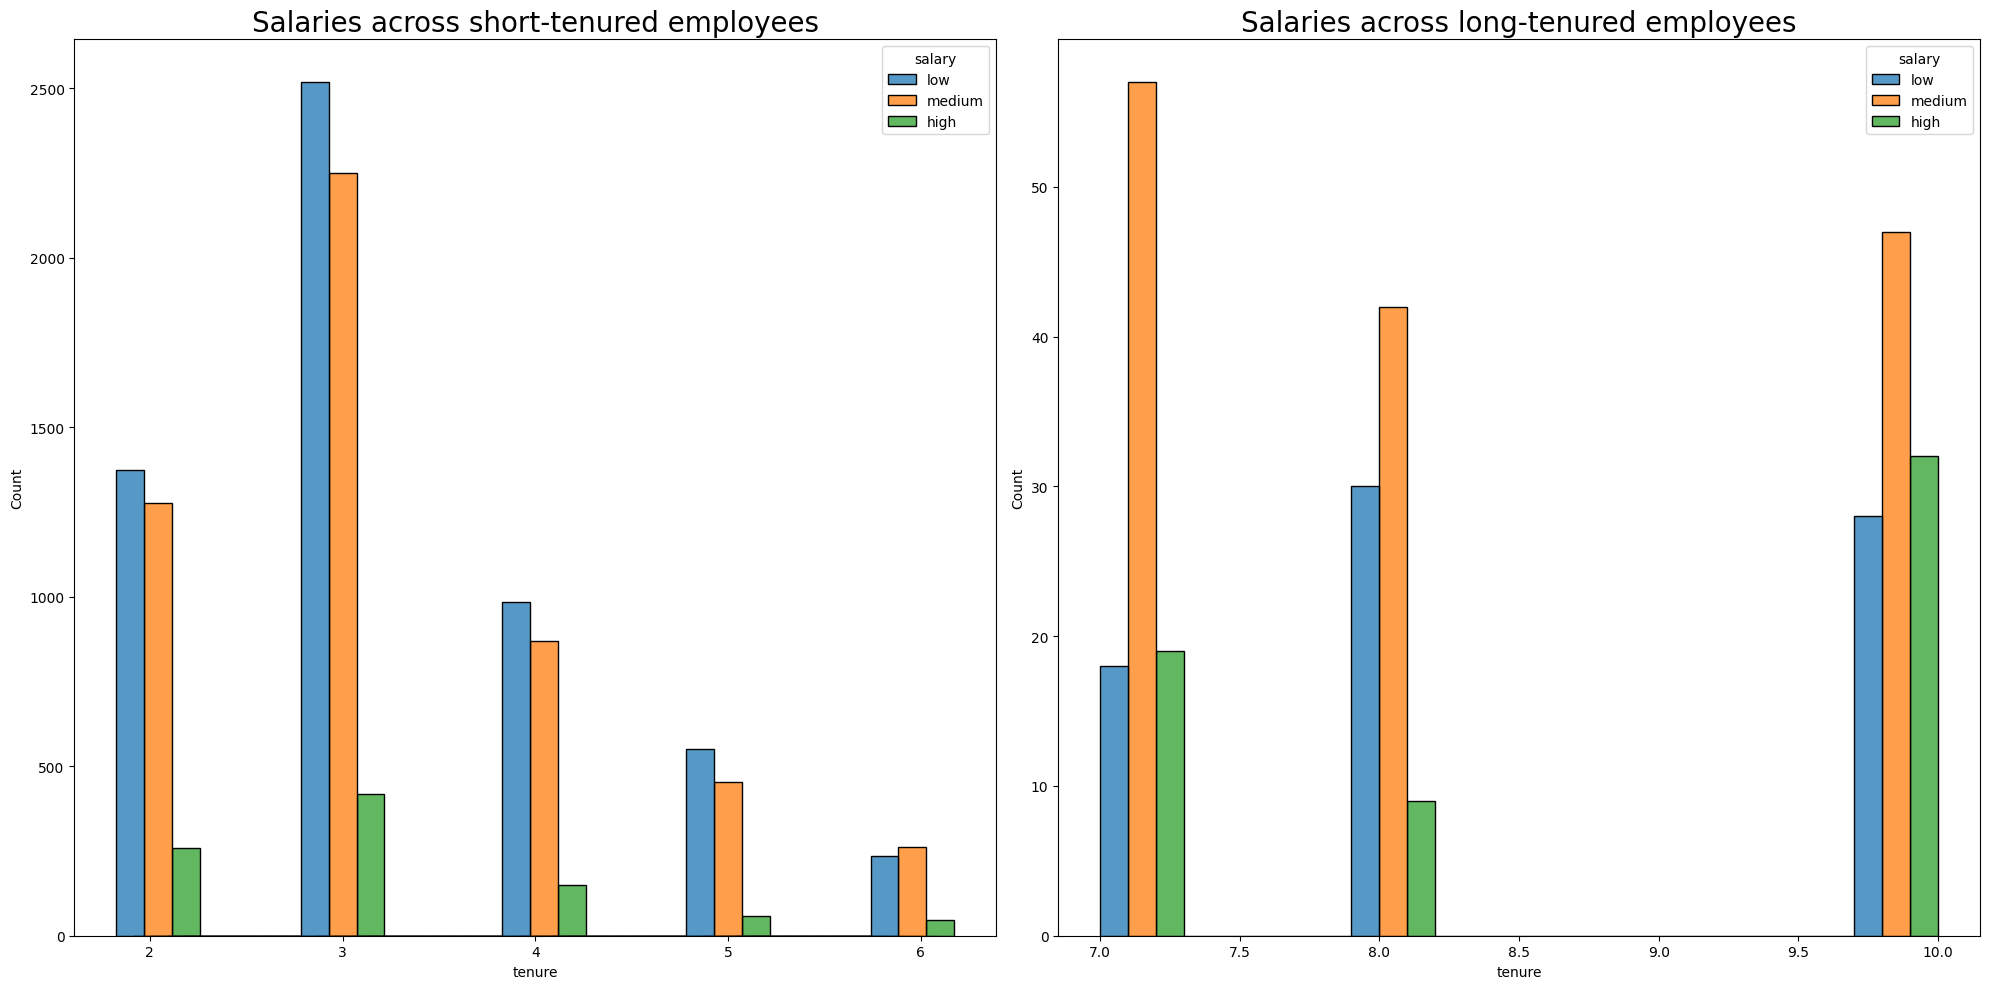

In [38]:
## divide the range for more clarification

short_tenured = df2[df2.tenure <= 6]
long_tenured = df2[df2.tenure > 6]

fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 10))

sns.histplot(data = short_tenured, x = 'tenure', hue = 'salary', multiple = 'dodge', shrink = 5, hue_order = ['low', 'medium', 'high'], ax = ax1)
sns.histplot(data = long_tenured, x = 'tenure', hue = 'salary', multiple = 'dodge', shrink = 1, hue_order = ['low', 'medium', 'high'], ax = ax2)

ax1.set_title('Salaries across short-tenured employees', fontsize = 20); ax2.set_title('Salaries across long-tenured employees', fontsize = 20)

plt.tight_layout()
plt.show()

***Notes***
* According to the histograms, long-tenured employees do not appear to receive high salaries.

---

##### promotion by number of working hours

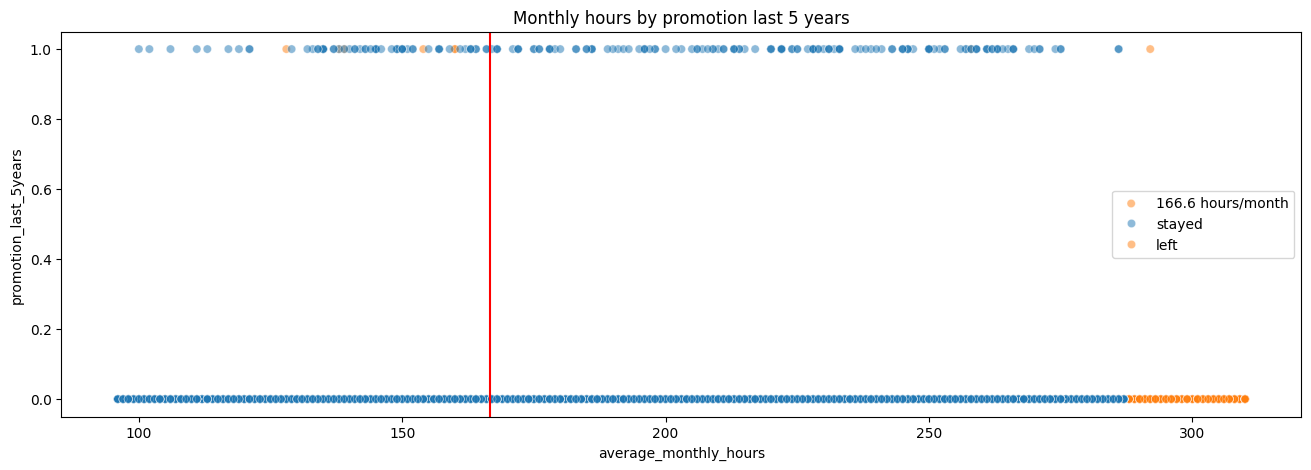

In [39]:
plt.figure(figsize = (16, 5))

ax = sns.scatterplot(data = df2, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.5)
ax.axvline(x = 166.6, color = 'red', label = '166.6 hours/month')

ax.set_title('Monthly hours by promotion last 5 years')
ax.legend(labels = ['166.6 hours/month', 'stayed', 'left'])

plt.show()

***Notes***
* Majority of employees who left tend to be those who worked the longest hours but did not receive a promotion.
* Generally, few employees receive a promotion.

---

##### Correlation map between the variables 

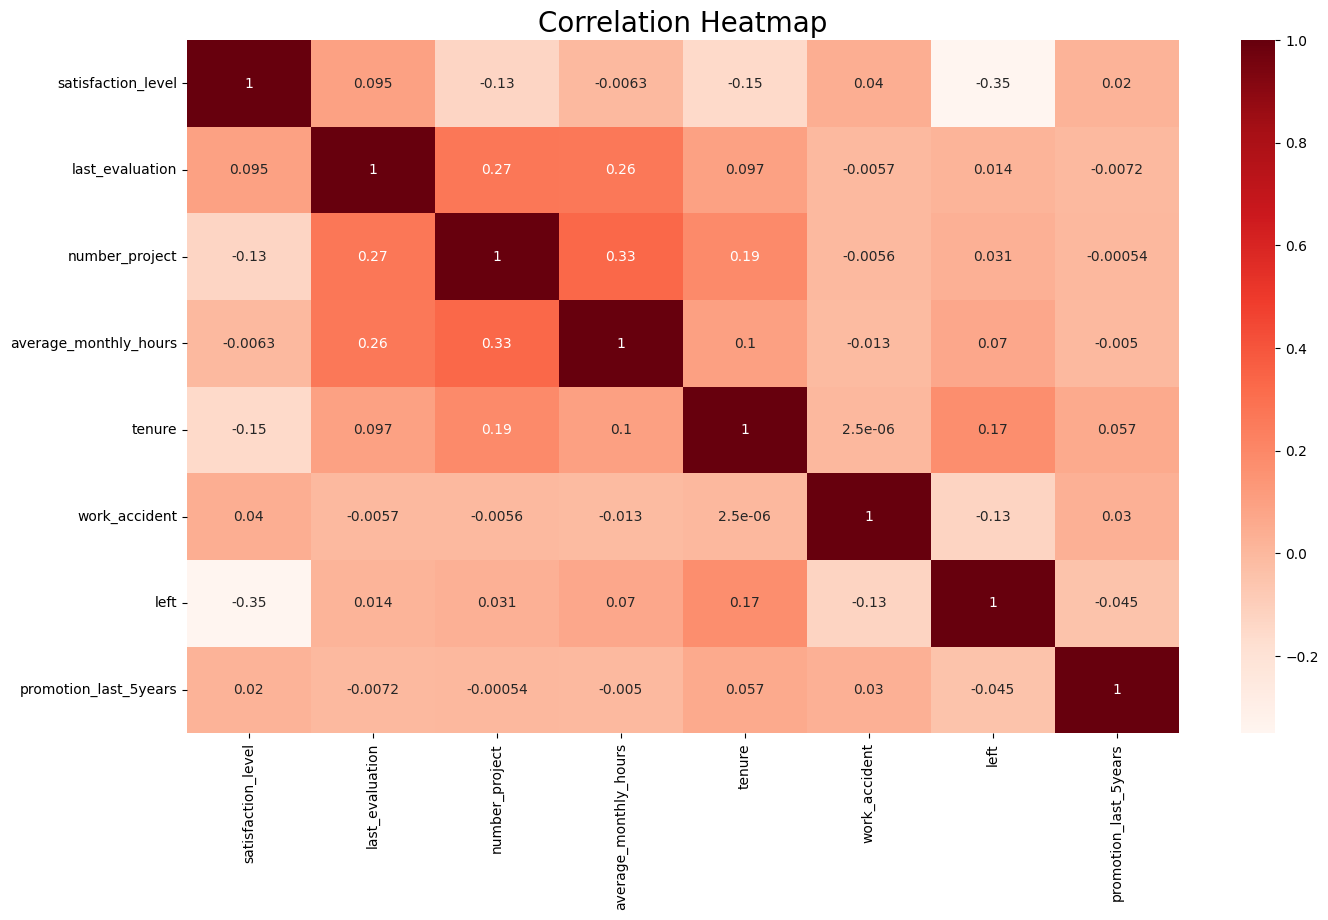

In [40]:
plt.figure(figsize = (16, 9))
ax = sns.heatmap(df2.corr(numeric_only = True), annot = True, cmap = 'Reds')

ax.set_title('Correlation Heatmap', fontsize = 20)

plt.show()

***Notes***
- Small correlations are observed among the variables `number_project`, `last_evaluation`, and `average_monthly_hours`.

### Insights

* The dataset shows an imbalance, with 83% of records representing employees who stayed with the company. The imbalance isn't significant enough to warrant resampling.

* Several indicators point to management issues:
    - Most employees work beyond standard monthly hours (166.6 for 40-hour weeks), with some logging 60-80 hours weekly.
    - Employees with longer tenure don't receive proportionally higher salaries.
    - Promotions are rare despite heavy workloads.
    - Consistent satisfaction levels across salary groups suggest non-financial factors (evaluations, promotions, hours) need improvement.
    <br>
* Monthly hours strongly correlate with attrition, revealing three employee patterns:-
    - Overloaded Employees: Work 60-80 hour weeks with high satisfaction/evaluation scores (e.g., all 7-project employees left).
    - Underestimated Employees: Work fewer hours/projects with low scores and high attrition.
    - Unrewarded Performers: Work longest hours without promotions, leading to departures.

---
---

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

* The goal is to develop a classification model that predicts whether an employee has left the company, based on the binary target variable `left`.

### Identify the types of models most appropriate for this task.

- This task requires a classification model. We'll follow a model selection process where multiple classification algorithms will be developed and evaluated. Our goal is to identify the best-performing model—also known as the champion model—based on validation set performance. The models we will explore include:
    * Logistic Regression
    * Decision Tree Classifier
    * Random Forest Classifier
    * XGBoost Classifier

### Process Overview
- The training process for each model will be carried out using the GridSearchCV algorithm. This approach allows us to perform cross-validation while exploring multiple combinations of hyperparameters to identify the optimal configuration. It also helps improve model generalization and reduce the risk of overfitting to the training data.

- Recall evaluation metrics

    - **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
    - **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
    - **Accuracy** measures the proportion of data points that are correctly classified.
    - **F1-score** is an aggregation of precision and recall.
    <br>


- Considering the Cost of Model Errors
    * **False Positive (FP): The model predicts that an employee will leave, but they actually stay** The cost is that the company may unnecessarily offer incentives such as raises, promotions, or other retention efforts. While this results in some additional cost, it may still positively influence employee satisfaction and loyalty.
    * **False Negative (FN): The model predicts that an employee will stay, but they actually leave** The Cost is that the company loses the employee without taking proactive measures, which can disrupt workflows, reduce productivity, and hurt team morale. It may also impact the company's reputation if turnover is high.
    * While both errors have consequences, False Negatives are more costly. Therefore, the model should prioritize minimizing (FNs). Hence, we will use `Recall` as a primary evaluation metric.
    <br>

- The complete process will follow these steps:-
    1. Perform feature engineering and preprocessing as needed.
    2. Split the dataset into training, validation, and test subsets.
    3. Check the assumptions required for the `LogisticRegression` model, then train it using `GridSearchCV` and evaluate its performance on the validation set.
    4. Train each tree-based model (`DecisionTree`, `RandomForest`, and `XGBoost`) using `GridSearchCV` and evaluate them on the validation set.
    5. Select the best-performing model on the validation set as the final (champion) model, and assess its performance on the unseen test set.


![Model Selection Process](visuals/model_selection_process.png)

* Image Credit: `Google Advanced Data Analytics` Certificate on Coursera.

### Modeling

#### Feature Engineering & Data preprocessing

- All variables in the dataset appear to have a meaningful relationship with the target variable left. However, some of these variables may not be available or reliable when the model is deployed in a real-world setting — for instance, `satisfaction_level` may not be consistently recorded for all employees. Additionally, instead of using the continuous variable `average_monthly_hours`, we can utilize the encoded categorical version `average_monthly_hours_levels`, which may offer a more interpretable alternative.

* Dropping the `satiafaction_level` and `average_monthly_hours` variables

In [41]:
df3 = df2.drop(columns = ['satisfaction_level', 'average_monthly_hours'])

* Encoding the `average_monthly_hours_levels` variable as ordinal encoding

In [42]:
df3['average_monthly_hours_levels'].value_counts()

average_monthly_hours_levels
medium       3040
low          3005
high         2979
very_high    2967
Name: count, dtype: int64

In [43]:
average_monthly_hours_levels_dict = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
    'very_high' : 3
}

df3['average_monthly_hours_levels'] = df3['average_monthly_hours_levels'].map(average_monthly_hours_levels_dict)

In [44]:
df3['average_monthly_hours_levels'].value_counts()

average_monthly_hours_levels
1    3040
0    3005
2    2979
3    2967
Name: count, dtype: int64

* Encoding the `salary` variable as ordinal encoding

In [45]:
df3['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [46]:
df3['salary'] = (
    df3['salary']
    .astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

In [47]:
df3['salary'].value_counts()

salary
0    5740
1    5261
2     990
Name: count, dtype: int64

* Dummy encode the `department` variable

In [48]:
df3.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,department,salary,average_monthly_hours_levels
0,0.53,2,3,0,1,0,sales,0,0
1,0.86,5,6,0,1,0,sales,1,3
2,0.88,7,4,0,1,0,sales,1,3
3,0.87,5,5,0,1,0,sales,0,2
4,0.52,2,3,0,1,0,sales,0,1


In [49]:
df_encoded = pd.get_dummies(df3, drop_first = True)

In [50]:
df_encoded.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,average_monthly_hours_levels_1,average_monthly_hours_levels_2,average_monthly_hours_levels_3
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,True,False,False,False,False,False
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,True,False,False,False,False,True
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,True,False,False,False,False,True
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,True,False,False,False,True,False
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,True,False,False,True,False,False


In [51]:
df_encoded.shape

(11991, 19)

---

#### Split the data

In [52]:
X = df_encoded.drop(['left'], axis = 1)
y = df_encoded['left']

In [53]:
X.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,average_monthly_hours_levels_1,average_monthly_hours_levels_2,average_monthly_hours_levels_3
0,0.53,2,3,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False
1,0.86,5,6,0,0,1,False,False,False,False,False,False,True,False,False,False,False,True
2,0.88,7,4,0,0,1,False,False,False,False,False,False,True,False,False,False,False,True
3,0.87,5,5,0,0,0,False,False,False,False,False,False,True,False,False,False,True,False
4,0.52,2,3,0,0,0,False,False,False,False,False,False,True,False,False,True,False,False


In [54]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [55]:
# Train: 80% -- validation: 20% -- test: 20%
X_tr, X_test, y_tr, y_test = train_test_split(
    X, y,
    test_size = 0.2, # 20% for the test data
    random_state = 0,
    stratify = y
)


X_train, X_validate, y_train, y_validate = train_test_split(
    X_tr, y_tr,
    test_size = 0.25, # 25% of 80% -> 20% for the validation data
    random_state = 0,
    stratify = y_tr
)

In [56]:
X_train.shape, X_validate.shape, X_test.shape, y_train.shape, y_validate.shape, y_test.shape

((7194, 18), (2398, 18), (2399, 18), (7194,), (2398,), (2399,))

---

#### Define Helpful functions

* Function to save models

In [57]:
def save_model(path, model_object, saved_model_name : str):
    '''
    Parameters
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        saved_model_name:      filename for how you want to save the model
    '''
    with open(path + saved_model_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

* Function to load models


In [58]:
def load_model(path, saved_model_name : str):
    '''
    Parameters
        path:             path of folder where you want to save the pickle
        saved_model_name: filename for how you want to save the model
    Returns
        model: the pickled model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

* Function to run **GridSearch** algorithm

In [59]:
def run_grid_search(estimator, model_parameters):
    '''
    Parameters
        estimator:        the model used in training
        model_parameters: the hyperparameters that will be tuned
    Returns
        model: the trained model
    '''
    scoring = ['recall', 'precision', 'accuracy', 'f1']
    model = GridSearchCV(
        estimator = estimator,
        param_grid = model_parameters,
        scoring = scoring,
        cv = 5,            # five validation folds
        refit = 'recall',  # the performance metric for evaluation
        n_jobs = -1,
        verbose = 3,
    )

    return model

* Function to extract all results from the GridSearch training 

In [60]:
def make_results(model_name : str, model_object, evaluation_metric : str):
    '''
    Parameters:
        model_name (string): what you want the model to be called in the output table
        model_object:        a fit GridSearchCV object
        metric (string):     precision, recall, f1, accuracy, or auc
  
    Returns 
        table: pandas df contains the grid_search metrics 
    '''
    metric_dict = {
        'precision' : 'mean_test_precision',
        'recall' : 'mean_test_recall',
        'accuracy' : 'mean_test_accuracy',
        'f1' : 'mean_test_f1'
    }

    # Get the grid_search results
    cv_results = pd.DataFrame(model_object.cv_results_)

    # best estimator resultsb
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[evaluation_metric]].idxmax(), :]

    # scores
    f1 = round(best_estimator_results.mean_test_f1, 4)
    precision = round(best_estimator_results.mean_test_precision, 4)
    accuracy = round(best_estimator_results.mean_test_accuracy, 4)
    recall = round(best_estimator_results.mean_test_recall, 4)

    table = pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1],
        'Accuracy': [accuracy],
    })

    
    return table

* Function to get scores on validation data

In [61]:
def get_scores(model_name:str, model, X_validate_data, y_validate_data):
    '''
    Parameters: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_validate_data:      numpy array of X_test data
        y_validate_data:      numpy array of y_test data

    Returns
        table: pandas df contains the prediction metrics 
    '''

    preds = model.best_estimator_.predict(X_validate_data)

    accuracy = round(accuracy_score(y_validate_data, preds), 4)
    precision = round(precision_score(y_validate_data, preds), 4)
    recall = round(recall_score(y_validate_data, preds), 4)
    f1 = round(f1_score(y_validate_data, preds), 4)

    table = pd.DataFrame({
        'Model': [model_name],
        'Precision': [precision],
        'Recall': [recall],
        'F1': [f1],
        'Accuracy': [accuracy],
    })

    
    return table

---

#### Logistic Regression

***Logistic Regression model assumptions***
- **Independence of Observations:** Each record corresponds to an individual employee’s data, and duplicates have been removed. Therefore, this assumption is considered satisfied.
- **No Severe Multicollinearity Among Predictors:** The correlation heatmap indicates that the relationships among the independent variables are not strong enough to raise multicollinearity concerns. Thus, this assumption is met.
- **No extreme outliers.**

- Removing the outliers in the `Tenure` variable
- Notes on removing outliers.
    - The `Logistic Regression` model is more sensitive to outliers compared to tree-based models. Therefore, outliers will be removed only from the training set used for `Logistic Regression`. The validation and test sets will remain unchanged to ensure fair evaluation and comparison across all models. Additionally, this approach allows us to assess the model's performance on unseen, real-world data that may include noise or outliers.
    - We could also choose to remove outliers from the entire dataset before splitting and building any model. However, in our case, it is possible for the `tenure` variable to have values that are higher than the typical range. So, these values are considered valid and should not be treated as errors.

In [62]:
log_reg_train = pd.concat([X_train, y_train], axis = 1)
log_reg_train.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,average_monthly_hours_levels_1,average_monthly_hours_levels_2,average_monthly_hours_levels_3,left
10388,0.65,5,2,0,0,0,False,False,False,False,True,False,False,False,False,True,False,False,0
7447,0.72,3,3,0,0,1,False,False,False,False,False,False,False,False,True,True,False,False,0
9958,0.59,5,3,0,0,0,False,False,True,False,False,False,False,False,False,True,False,False,0
11004,0.91,3,3,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,0
1080,0.95,4,5,0,0,1,False,False,False,False,False,False,True,False,False,False,True,False,1


In [63]:
# Determine the outliers in the `log_reg_train` data
q1_log_reg = log_reg_train.tenure.quantile(0.25)
q3_log_reg = log_reg_train.tenure.quantile(0.75)
iqr_log_reg = q3_log_reg - q1_log_reg
lower_limit_log_reg = q1_log_reg - 1.5 * iqr_log_reg
upper_limit_log_reg = q3_log_reg + 1.5 * iqr_log_reg

len(log_reg_train[(log_reg_train['tenure'] < lower_limit_log_reg) | (log_reg_train['tenure'] > upper_limit_log_reg)])

486

In [64]:
log_reg_train = log_reg_train[(log_reg_train['tenure'] >= lower_limit_log_reg) & (log_reg_train['tenure'] <= upper_limit_log_reg)]

In [65]:
len(log_reg_train[(log_reg_train['tenure'] < lower_limit_log_reg) | (log_reg_train['tenure'] > upper_limit_log_reg)])

0

In [66]:
X_train_log = log_reg_train.drop(['left'], axis = 1)
y_train_log = log_reg_train['left']

In [67]:
X_train_log.head()

,last_evaluation,number_project,tenure,work_accident,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,average_monthly_hours_levels_1,average_monthly_hours_levels_2,average_monthly_hours_levels_3
10388,0.65,5,2,0,0,0,False,False,False,False,True,False,False,False,False,True,False,False
7447,0.72,3,3,0,0,1,False,False,False,False,False,False,False,False,True,True,False,False
9958,0.59,5,3,0,0,0,False,False,True,False,False,False,False,False,False,True,False,False
11004,0.91,3,3,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False
1080,0.95,4,5,0,0,1,False,False,False,False,False,False,True,False,False,False,True,False


In [68]:
y_train_log.head()

10388    0
7447     0
9958     0
11004    0
1080     1
Name: left, dtype: int64

In [69]:
X_train_log.shape, y_train_log.shape

((6708, 18), (6708,))

* Build the `LogisticRegression` model

In [70]:
lr = LogisticRegression(max_iter = 500, random_state = 0)

cv_params = {
    'C': [0.01, 0.1, 1, 10, 100], # strength of regularization
    'penalty': ['l2'],            # ridge regularization for `lbfgs`
    'solver': ['lbfgs'],          # for medium-large datasets
    'max_iter': [500, 700]
}

lr_cv = run_grid_search(lr, cv_params)

In [71]:
# %%time
# lr_cv.fit(X_train_log, y_train_log) 

In [72]:
## Save the model
# save_model('models/', lr_cv, 'log_reg_salifort')

#### DecisionTreeClassifier

In [73]:
tree = DecisionTreeClassifier(random_state = 0)

cv_params = {
    'max_depth' : [4, 6],
    'min_samples_leaf' : [2, 5],
    'min_samples_split' : [2, 6],
}

tree_cv = run_grid_search(tree, cv_params)

In [74]:
# %%time
# tree_cv.fit(X_train, y_train)

In [75]:
# save_model('models/', tree_cv, 'decision_tree_salifort')

#### Random Forest Classifier

In [76]:
rf = RandomForestClassifier(random_state = 0)

cv_params = {
    'max_depth' : [4, 6],
    'min_samples_leaf' : [2, 5],
    'min_samples_split' : [2, 6],
    'max_features' : [0.7, 1.0],
    'n_estimators' : [150, 200],
    'max_samples' : [0.7, 0.9]
}

rf_cv = run_grid_search(rf, cv_params)

In [77]:
# %%time
# rf_cv.fit(X_train, y_train)

In [78]:
# save_model('models/', rf_cv, 'random_forest_salifort')

#### XGBoost Classifier

In [79]:
xgb = XGBClassifier(objective = 'binary:logistic', random_state = 0)

cv_params = {
    'max_depth' : [4, 6],
    'min_child_weight' : [2, 5],
    'learning_rate' : [0.1, 0.2, 0.3],
    'n_estimators' : [150, 200]
}

xgb_rv = run_grid_search(xgb, cv_params)

In [80]:
# %%time
# xgb_rv.fit(X_train, y_train)

In [81]:
# save_model('models/', xgb_rv, 'xgboost_salifort')

---

#### Models Comparison

In [82]:
# Read models
log_reg = load_model('models/', 'log_reg_salifort')
decision_tree = load_model('models/', 'decision_tree_salifort')
random_forest = load_model('models/', 'random_forest_salifort')
xgboost = load_model('models/', 'xgboost_salifort')
models = [log_reg, decision_tree, random_forest, xgboost]

* Get best estimator results for each model

In [83]:
for model in models:
    print(f'Model => {model.estimator.__class__.__name__}')
    print(f'Best Estimator => {model.best_estimator_}')
    print(f'Best Parameters => {model.best_params_}')
    print(f'Best Croos Validation Score => {model.best_score_}')
    print('-' * 100)

Model => LogisticRegression
Best Estimator => LogisticRegression(C=1, max_iter=500, random_state=0)
Best Parameters => {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Croos Validation Score => 0.14435791543756143
----------------------------------------------------------------------------------------------------
Model => DecisionTreeClassifier
Best Estimator => DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, random_state=0)
Best Parameters => {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Croos Validation Score => 0.9046025104602512
----------------------------------------------------------------------------------------------------
Model => RandomForestClassifier
Best Estimator => RandomForestClassifier(max_depth=6, max_features=1.0, max_samples=0.9,
                       min_samples_leaf=2, n_estimators=150, random_state=0)
Best Parameters => {'max_depth': 6, 'max_features': 1.0, 'max_samples': 0.9, 'min_samples_leaf': 2, 'min_samples_

* Get grid Search results

In [84]:
models_grid_search_results = pd.DataFrame()

for model in models:
    model_result = make_results(model.estimator.__class__.__name__, model, 'recall')
    models_grid_search_results = pd.concat([models_grid_search_results, model_result], axis = 0)

In [85]:
models_grid_search_results = models_grid_search_results.sort_values(by = ['Recall'], ascending = False).reset_index(drop = True)

In [86]:
models_grid_search_results

,Model,Precision,Recall,F1,Accuracy
0,DecisionTreeClassifier,0.8688,0.9046,0.8862,0.9614
1,RandomForestClassifier,0.8969,0.9021,0.8995,0.9665
2,XGBClassifier,0.9102,0.8887,0.8993,0.9669
3,LogisticRegression,0.3781,0.1444,0.2082,0.8154


* Making predictions of validation data and getting results

In [87]:
models_scores_validation = pd.DataFrame()

for model in models:
    model_result = get_scores(model.estimator.__class__.__name__, model, X_validate, y_validate)
    models_scores_validation = pd.concat([models_scores_validation, model_result], axis = 0)

In [88]:
models_scores_validation = models_scores_validation.sort_values(by = ['Recall'], ascending = False).reset_index(drop = True)

In [89]:
models_scores_validation

,Model,Precision,Recall,F1,Accuracy
0,RandomForestClassifier,0.8870,0.9070,0.8969,0.9654
1,DecisionTreeClassifier,0.8707,0.8970,0.8837,0.9608
2,XGBClassifier,0.9084,0.8970,0.9027,0.9679
3,LogisticRegression,0.2738,0.1809,0.2179,0.7844


* The Decision Tree Classifier has the best `recall` score. Hence, it will be selected as the champion model and will be evaluated on the test data.

#### Champion model Evaluation on the test data

In [90]:
y_pred = decision_tree.best_estimator_.predict(X_test)

In [91]:
# Get the metrics
print(f'Accuracy => {round(accuracy_score(y_test, y_pred), 3) * 100}%')
print(f'Precision => {round(precision_score(y_test, y_pred), 3) * 100}%')
print(f'Recall => {round(recall_score(y_test, y_pred), 3) * 100}%')
print(f'F1 => {round(f1_score(y_test, y_pred), 3) * 100}%')

Accuracy => 96.2%
Precision => 87.9%
Recall => 89.7%
F1 => 88.8%


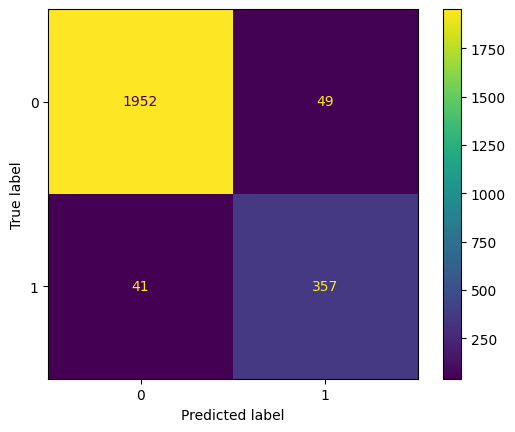

In [92]:
# Plot a confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = decision_tree.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.best_estimator_.classes_)
disp.plot()
plt.show()

***Notes***
* The Decision Tree model performs strongly, successfully identifying the majority of data points. The number of false positives is slightly higher than false negatives, which aligns with our earlier focus on maximizing Recall.

* Getting the most impactful features

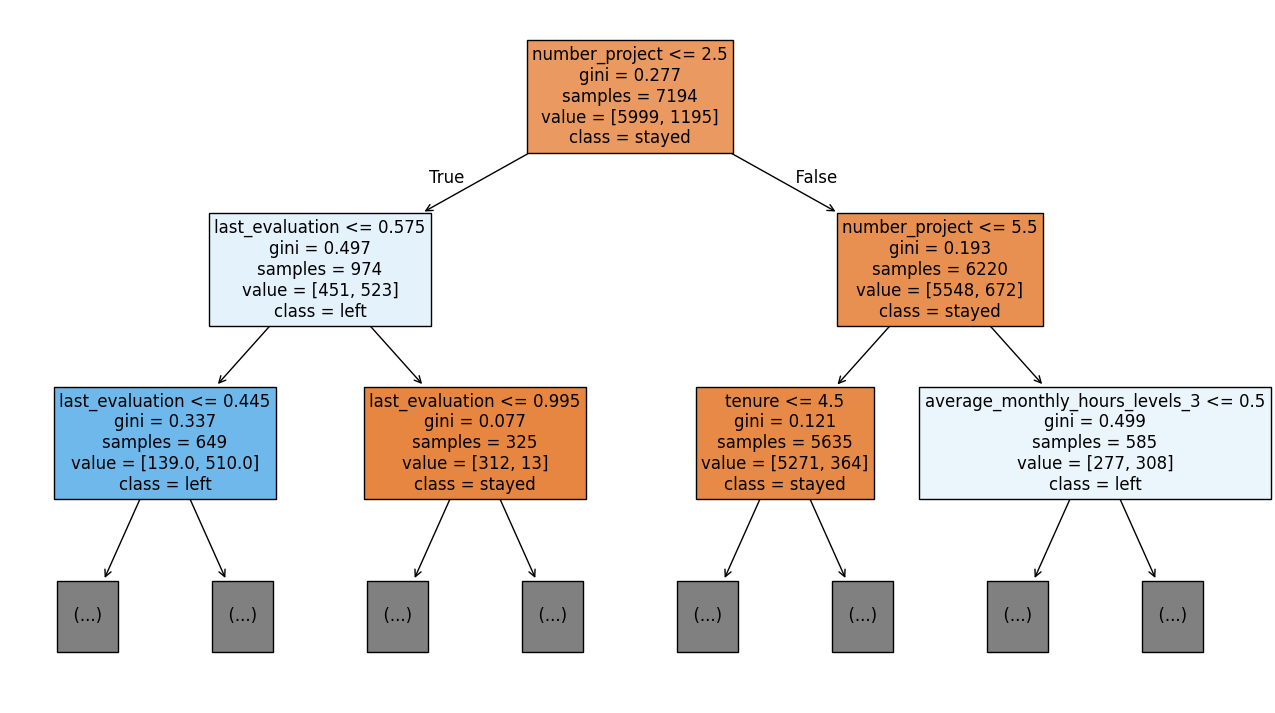

In [93]:
## Plot the tree
plt.figure(figsize = (16, 9))
plot_tree(
    decision_tree = decision_tree.best_estimator_,
    max_depth = 2,
    fontsize = 12, 
    feature_names = X.columns,
    class_names = {0 : 'stayed', 1 : 'left'},
    filled = True
);

In [94]:
## The most important features
important_features = decision_tree.best_estimator_.feature_importances_
important_features = pd.Series(
    data = important_features,
    index = X.columns
).sort_values(ascending = False)

important_features

number_project                    0.381501
last_evaluation                   0.315781
tenure                            0.168634
average_monthly_hours_levels_3    0.100824
average_monthly_hours_levels_1    0.020278
average_monthly_hours_levels_2    0.008867
department_technical              0.001369
department_sales                  0.001125
salary                            0.000970
department_support                0.000477
work_accident                     0.000174
department_management             0.000000
department_accounting             0.000000
department_RandD                  0.000000
promotion_last_5years             0.000000
department_hr                     0.000000
department_marketing              0.000000
department_product_mng            0.000000
dtype: float64

In [95]:
most_important_features = important_features.head(n = 11)

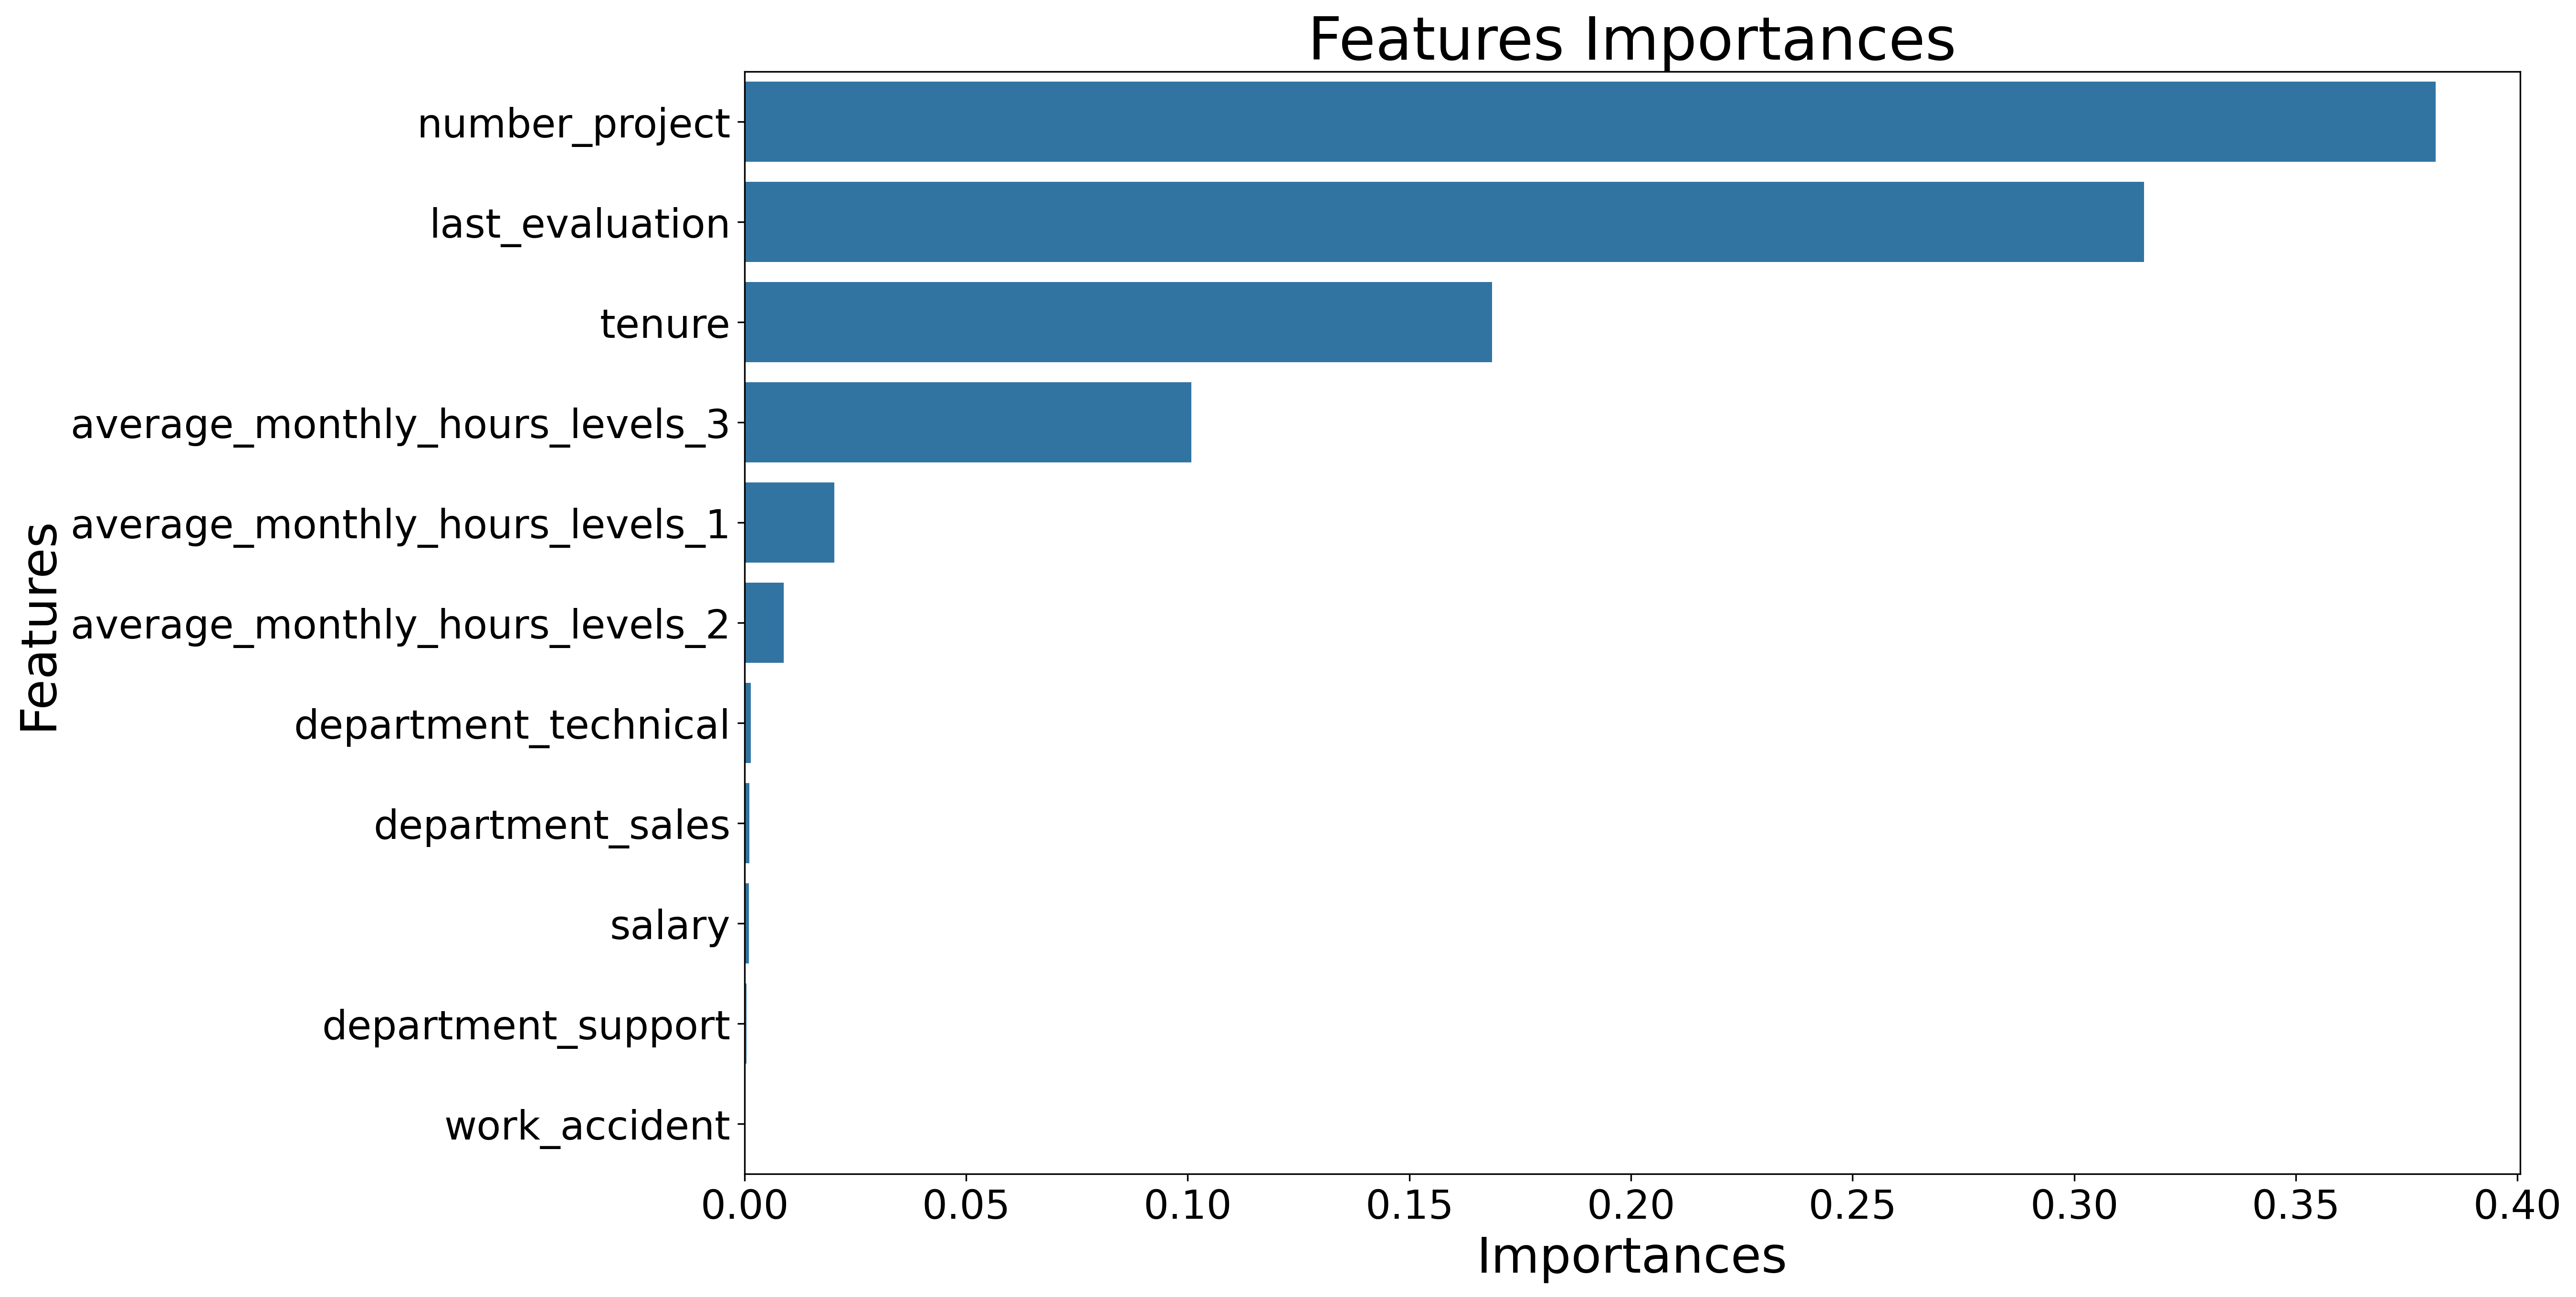

In [96]:
## Plot the most important features
plt.figure(figsize = (16, 10), dpi = 300)
sns.barplot(y = most_important_features.index, x = most_important_features.values)

plt.title('Features Importances', fontsize = 30)
plt.xlabel('Importances', fontsize = 25)
plt.ylabel('Features', fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.show()

***Notes***
* Based on the plots, the variables `number_project`, `last_evaluation`, `tenure`, and `average_monthly_hours` appear to be the most influential features in the model's predictions.

---
---

# pacE: Execute Stage


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

* Among the four models built, the Decision Tree emerged as the best performer. On the test set, it shows strong ability to identify employees likely to leave. It has a `recall` score of 89.7%, `precision` of 87.9%, `f1` of 88.8%, and `accuracy` of 96.2% on the test data.  

* The model consistently performed well across the training, validation, and test sets, indicating good generalization capability. This suggests it is not overfitting and can be reliably used to predict future data.

* The most influential features in the model’s predictions are `number_project`, `last_evaluation`, `tenure`, and `average_monthly_hours` in that order.

### Conclusion, Recommendations, Next Steps

***Conclusion***
- The employee management process at Salifort Corporation needs improvement. The analysis revealed that a significant portion of the workforce is working beyond the standard hours. On the modeling side, the predictive model successfully identifies employee turnover, offering valuable insights for proactive management.

***Recommendations***
* The number of projects assigned to employees should be capped or better organized to reduce overload on highly burdened employees and to provide growth opportunities for those with lighter workloads.
* Consider promoting mid-tenure employees or collecting additional data to understand why they may be more likely to leave.
* Provide rewards, salary increases, or promotions to employees with heavy workloads—or avoid overburdening them in the first place.
* Establish a fair and balanced evaluation system that takes into account work quality, time commitment, and overall employee contribution.

***Next Steps***
- Gathering additional data—such as typical employee salary ranges and specific reasons for leaving or dissatisfaction—could enhance future analyses and support the development of more effective employee retention strategies.

---
---

***ALHAMDULILLAH***

---
---